### **Waze Predicitve Model Project**

##### **The purpose of this project is to conduct a study of sample user data to gain insight into what factors lead to user disconinuance (churn) of utilizing the Waze app. This project is based on my practice-based learning while completing the 7 courses of the Google Advanced Data Analytics Certificate. The project covers the processes of EDA, data visualization, hypothesis testing, regression analysis, and tree-based analysis using decision tree and random forest machine learning models. The data is fictitious, and was provided by the Certificate courses.**

##### **The analytic framework of this project is based on the PACE workflow model. PACE (Plan, Analyize, Construct, Execute) is the workflow model utilized throughout Google's Advanced Analytics Certificate. I have subdivided this notebook based on these 4 stages of this framework.**

### **PACE: Plan**

### **Step 1: Project Planning**

#### **The purpose** of this project is to find factors that drive user churn.

#### **The goal** of this projectis to predict whether a Waze user is retained or churned.

#### **1. Do we have adequate data to conduct a worthwhile study, and create predictive models?**

##### We have a sample dataset in a tabular csv format, created by the data engineering team. The team has done well for us in the past, therefore there is strong reason to believe they have done an excellent job again. More answers to this question will be gained through EDA and visaulizations.  

#### **2. If a machine learning model is created, what is the likely effect of the model when it predicts a false negative (when the model says a user won't churn, but they will)?**

##### Waze will fail to take proactive measures to retain users who are likely to stop using the app. For example, Waze might miss proactively push an app notification to users, or miss the opportunity to send a survey to better understand user dissatisfaction.

#### **3. If a machine learning model is created, what is the likely effect of the model when it predicts a false positive (when the model says a Waze user will churn, but they won't)?**

##### Waze may take unnecessary proactive measures to retain users who are NOT likely to churn. This may lead to an annoying or negative experience for loyal users of the app, as well as wasting company resources.

#### **4. Do the benefits of creating a model outweigh the potential problems?**

##### The proactive measueres taken by Waze might have unintended effects on users, and these effects might encourage user churn. Follow-up analysis on the effectiveness of the measures is recommended. If the measures are reasonable and effective, then the benefits will most likely outweigh the problems.

#### **5. Is it in the best interest of the business to proceed with the leadership's request to conduct this study, and build the models?** 

##### Yes. There are no significant risks for conducting this study and building such a model.

#### **Step 1a: Imports and Data Loading.**

In [43]:
# Packages for data manipulation
import numpy as np
import pandas as pd

# Packages for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Set option to see all columns, preventing Juptyer from redacting them.
pd.set_option('display.max_columns', None)

# Package for hypothesis testing
from scipy import stats

# Packages for data modeling and metrics
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import roc_auc_score, roc_curve, auc
from sklearn.metrics import accuracy_score, precision_score, recall_score,\
f1_score, confusion_matrix, ConfusionMatrixDisplay, RocCurveDisplay 

# Packages for ML classifiers
from sklearn.linear_model import LogisticRegression
import sklearn.tree as tree
from sklearn.ensemble import RandomForestClassifier

In [44]:
# Load dataset
df0 = pd.read_csv('waze_dataset.csv')

### **PACE: Analyze**

### **Step 2: Data Cleaning and EDA**

#### **Step 2a: Data Cleaning**

In [48]:
# Display info
df0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       14999 non-null  int64  
 1   label                    14299 non-null  object 
 2   sessions                 14999 non-null  int64  
 3   drives                   14999 non-null  int64  
 4   total_sessions           14999 non-null  float64
 5   n_days_after_onboarding  14999 non-null  int64  
 6   total_navigations_fav1   14999 non-null  int64  
 7   total_navigations_fav2   14999 non-null  int64  
 8   driven_km_drives         14999 non-null  float64
 9   duration_minutes_drives  14999 non-null  float64
 10  activity_days            14999 non-null  int64  
 11  driving_days             14999 non-null  int64  
 12  device                   14999 non-null  object 
dtypes: float64(3), int64(8), object(2)
memory usage: 1.5+ MB


In [49]:
# Display info for df0
df0.isna().sum()

ID                           0
label                      700
sessions                     0
drives                       0
total_sessions               0
n_days_after_onboarding      0
total_navigations_fav1       0
total_navigations_fav2       0
driven_km_drives             0
duration_minutes_drives      0
activity_days                0
driving_days                 0
device                       0
dtype: int64

##### **We see from the info() display above that we are missing values in the 'label' column in 700 rows of the data. I will examine this further.**

##### **Compare the rows with null values to the rows with non-null values.**

In [52]:
# Isolate rows without null values
not_null_df0 = df0[~df0['label'].isnull()]

In [53]:
# Check the not_null_df0 dataframe
not_null_df0.isna().sum()

ID                         0
label                      0
sessions                   0
drives                     0
total_sessions             0
n_days_after_onboarding    0
total_navigations_fav1     0
total_navigations_fav2     0
driven_km_drives           0
duration_minutes_drives    0
activity_days              0
driving_days               0
device                     0
dtype: int64

In [54]:
# Isolate rows with null values
null_df0 = df0[df0['label'].isnull()]

In [55]:
# Check the null_df0 dataframe
null_df0.isna().sum()

ID                           0
label                      700
sessions                     0
drives                       0
total_sessions               0
n_days_after_onboarding      0
total_navigations_fav1       0
total_navigations_fav2       0
driven_km_drives             0
duration_minutes_drives      0
activity_days                0
driving_days                 0
device                       0
dtype: int64

In [56]:
# Display number of iPhone and Android users that had null values in 'label' column
print ('Number of iPhone and Android users that had null values in label column.')
null_df0['device'].value_counts()

Number of iPhone and Android users that had null values in label column.


device
iPhone     447
Android    253
Name: count, dtype: int64

In [57]:
# Display percentage of iPhone and Android users that had null values in 'label' column
print('Percentage of iPhone and Android users that had null values in label column.')
null_df0['device'].value_counts(normalize=True)

Percentage of iPhone and Android users that had null values in label column.


device
iPhone     0.638571
Android    0.361429
Name: proportion, dtype: float64

In [58]:
# Show how this compares to the device ratio in the full dataset
print('Percentage of iPhone and Android users that had non-null values in label column.') 
df0['device'].value_counts(normalize=True)

Percentage of iPhone and Android users that had non-null values in label column.


device
iPhone     0.644843
Android    0.355157
Name: proportion, dtype: float64

##### **We see from the above that the number of retained vs churned users is roughly the same for both the rows with null values in the 'label' column, and the rows with non-null values in 'label' (~64% iPhone and ~36% Android). We may decide to remove the rows with null values at a later time.** 

#### **Step 2b: Exploratory Data Analysis**

##### **Examine the counts and percentages of users who churned vs. retained.**

In [62]:
# Examine the counts and percentages of users who churned vs. retained. 
print(df0['label'].value_counts())
print()
print(df0['label'].value_counts(normalize=True))

label
retained    11763
churned      2536
Name: count, dtype: int64

label
retained    0.822645
churned     0.177355
Name: proportion, dtype: float64


##### **Roughly 82% of users stayed with the app, and about 18% of users churned.**

##### **Explore the median values of the columns.**

In [65]:
# Calculate median values of all columns for churned and retained users
df0.groupby('label').median(numeric_only=True)

,ID,sessions,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,activity_days,driving_days
label,,,,,,,,,,,
churned,7477.5,59.0,50.0,164.339042,1321.0,84.5,11.0,3652.655666,1607.183785,8.0,6.0
retained,7509.0,56.0,47.0,157.586756,1843.0,68.0,9.0,3464.684614,1458.046141,17.0,14.0


In [66]:
# Calculate the median kilometers per drive in the last month for ret and churned users.
medians_by_label = df0.groupby('label').median(numeric_only=True)
print('Median kilometers per drive:')
medians_by_label['driven_km_drives'] / medians_by_label['drives']

Median kilometers per drive:


label
churned     73.053113
retained    73.716694
dtype: float64

##### **The median distance users from both groups drove is ~73 km/drive.** 

In [68]:
# Determine how many kilometers per driving day this was.
# Divide the median distance by median number of driving days
print('Median kilometers per driving day:')
medians_by_label['driven_km_drives'] / medians_by_label['driving_days']

Median kilometers per driving day:


label
churned     608.775944
retained    247.477472
dtype: float64

##### **Here we see that users who churned drove 608 km per day, but those who did not churn drove around 247 km per day.**

In [70]:
# Calculate the median number of drives per driving day for each group.
# Divide the median number of drives by median number of driving days
print('Median drives per driving day:')
medians_by_label['drives'] / medians_by_label['driving_days']

Median drives per driving day:


label
churned     8.333333
retained    3.357143
dtype: float64

##### **This shows us that the median of users who churned drove around 8 times per day, but the median of those who did not churn drove about 3 times per day.**

##### **Examine the class inblance between churned and retained users by device type.**

In [73]:
# Examine whether there is an imbalance in how many users churned by device type.
print('Checking class balance: Number of users who churned and stayed by device type')
df0.groupby(['label', 'device']).size()

Checking class balance: Number of users who churned and stayed by device type


label     device 
churned   Android     891
          iPhone     1645
retained  Android    4183
          iPhone     7580
dtype: int64

In [74]:
# Display percentage of users who churned and stayed by device type
print('Percentage of users who churned and stayed by device type')
df0.groupby('label')['device'].value_counts(normalize=True)

Percentage of users who churned and stayed by device type


label     device 
churned   iPhone     0.648659
          Android    0.351341
retained  iPhone     0.644393
          Android    0.355607
Name: proportion, dtype: float64

##### **We see here that roughly twice as many iPhone users chruned and stayed with the app, compared with Android users.**
##### **What we see overall from the EDA above is that although median distance driven by churned and retained users is roughly 73 km, churned users drove further and more often than retained users.**

### **Step 3. Visualizations, Further EDA, and Outliers**

#### **Step 3a: Variable Distributions**

#### **Boxplots and histograms**

##### **'sessions' variable**

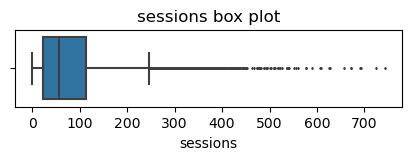

In [80]:
# Box plot of 'sessions' variable
plt.figure(figsize=(5,1))
sns.boxplot(x=df0['sessions'], fliersize=1)
plt.title('sessions box plot');

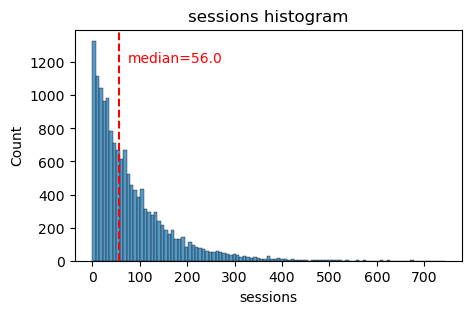

In [81]:
# Histogram of the 'sessions' variable
plt.figure(figsize=(5,3))
sns.histplot(x=df0['sessions'])
median = df0['sessions'].median()
plt.axvline(median, color='red', linestyle='--')
plt.text(75,1200, 'median=56.0', color='red')
plt.title('sessions histogram');

##### **The sessions variable is a right-skewed distribution with half of the observations having 56 or fewer sessions. However, as indicated by the boxplot, some users have more than 700.**

##### **'drives' variable**

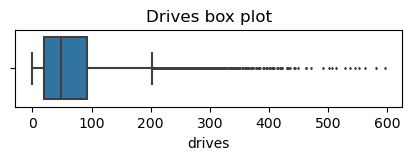

In [84]:
# Box plot of 'drives' variable
plt.figure(figsize=(5,1))
sns.boxplot(x=df0['drives'], fliersize=1)
plt.title('Drives box plot');

##### **From the boxplot above we see that the 'drives' variable appears to have a median of 50 drives, and several outliers above 450 drives.**

##### **The following function assits in plotting histograms with a particular style and format that is useful in this project. This helps reduce repetitive code.**

In [87]:
# Helper function to plot histograms based on the format of the `sessions` histogram
def plot_histogram(column_str, median_text=True, **kwargs): 
    median=round(df0[column_str].median(), 1)
    plt.figure(figsize=(5,3))
    ax = sns.histplot(x=df0[column_str], **kwargs)    # Plot the histogram
    plt.axvline(median, color='red', linestyle='--')  # Plot the median line
    if median_text==True:                             # Add median text unless set to False
        ax.text(0.25, 0.85, f'median={median}', color='red',
            ha='left', va='top', transform=ax.transAxes)
    else:
        print('Median:', median)
    plt.title(f'{column_str} histogram');

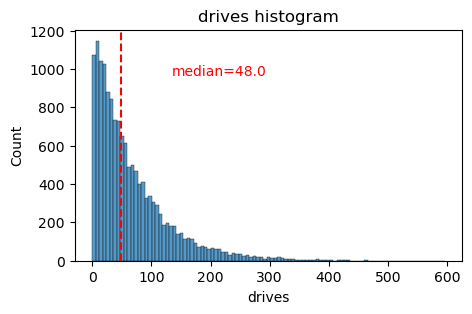

In [88]:
# Histogram of 'drives' variable
plot_histogram('drives')

##### **The above shows that the 'drives' variable follows a similar distribution to the 'sessions' variable. It is right-skewed, approximately log-normal, with a median of 48. As with the boxplot, we see the outlying values above 400 and 500 drives.** 

##### **'total_sessions' variable**

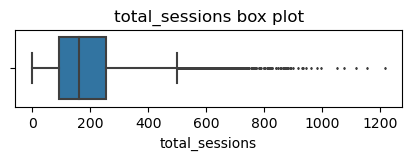

In [91]:
# Box plot of 'total sessions'
plt.figure(figsize=(5,1))
sns.boxplot(x=df0['total_sessions'], fliersize=1)
plt.title('total_sessions box plot');

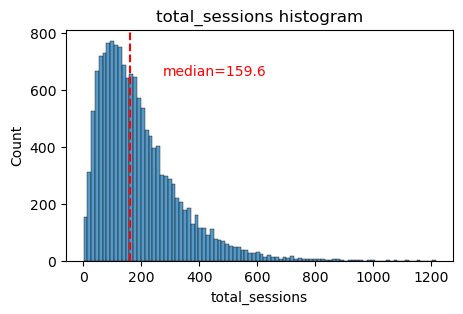

In [92]:
# Histogram of 'total sessions'
plot_histogram('total_sessions')

##### **The total_sessions variable has a right-skewed distribution. The median total number of sessions is 159.6. This is important because, if the median number of sessions in the last month was 56 and the median total sessions was ~160, then it seems apparent that a large proportion of a user's estimated total drives might have taken place in the last month.** 

##### **'n_days_since_onboarding' variable**

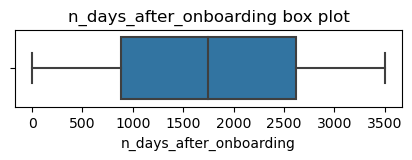

In [95]:
# Box plot of n_days_since_onboarding
plt.figure(figsize=(5,1))
sns.boxplot(x=df0['n_days_after_onboarding'], fliersize=1)
plt.title('n_days_after_onboarding box plot');

Median: 1741.0


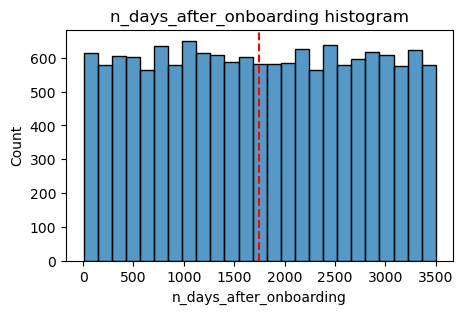

In [96]:
# Histogram of 'n_days_after_onbarding'
plot_histogram('n_days_after_onboarding', median_text=False)

##### **The number of days since onboarding is a uniform distribution with values ranging from near zero to around 3,500 (~9.5 years).**

##### **'driven_km_drives' variable**

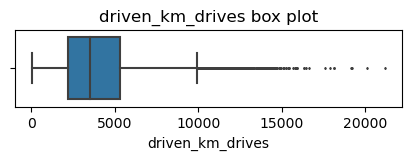

In [99]:
# Box plot of 'driven_km_drives'
plt.figure(figsize=(5,1))
sns.boxplot(x=df0['driven_km_drives'], fliersize=1)
plt.title('driven_km_drives box plot');

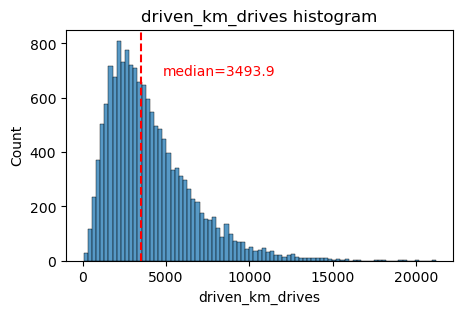

In [100]:
# Histogram of 'driven_km_drives'
plot_histogram('driven_km_drives')

##### **The number of kilometers driven in the last month per user is a right-skewed distribution with half the users driving under 3,495 kilometers (2,172 miles). We see here that the users in this dataset drive quite frequently.** 

##### **'duration_minutes_drives' variable**

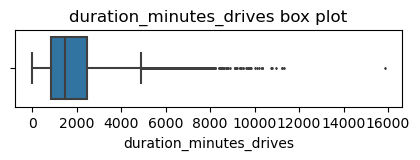

In [103]:
# Box plot 'duration_minutes_drives'
plt.figure(figsize=(5,1))
sns.boxplot(x=df0['duration_minutes_drives'], fliersize=1)
plt.title('duration_minutes_drives box plot');


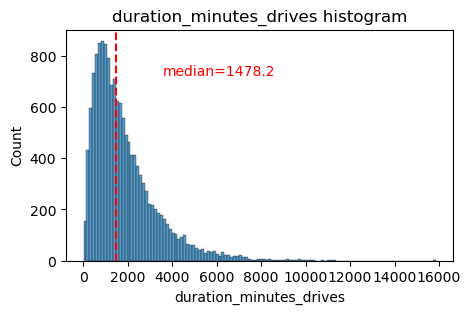

In [104]:
# Histogram of 'duration_minutes_drives'
plot_histogram('duration_minutes_drives')

##### **The duration_minutes_drives variable has a heavily skewed right tail. Half of the users drove less than ~ 1,478 minutes (~ 25 hours), but some users clocked over 250 hours during the month.**

##### **'activity_days' variable**

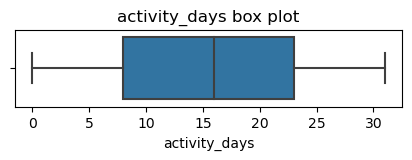

In [107]:
# Box plot of 'activity_days'
plt.figure(figsize=(5,1))
sns.boxplot(x=df0['activity_days'], fliersize=1)
plt.title('activity_days box plot');


Median: 16.0


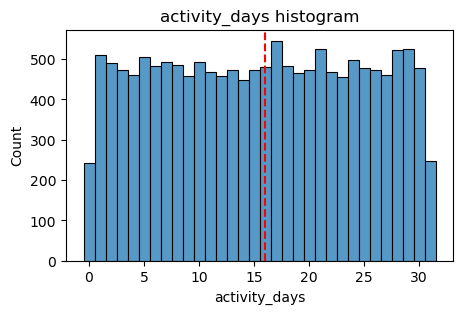

In [108]:
# Histogram of 'activity_days'
plot_histogram('activity_days', median_text=False, discrete=True)

##### **Within the last month, users opened the app a median of 16 times. The box plot reveals a centered distribution. The histogram shows a nearly uniform distribution of ~500 people opening the app on each count of days. However, there are ~250 people who didn't open the app at all and ~250 people who opened the app every day of the month. This distribution is interesting because it does not mirror the sessions distribution, which it seems to me would have been closely correlated with activity_days.**


##### **'driving_days' variable**

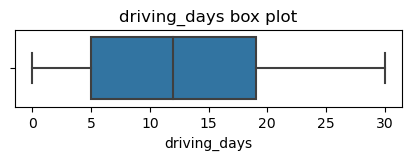

In [111]:
# Box plot of 'drving_days'
plt.figure(figsize=(5,1))
sns.boxplot(x=df0['driving_days'], fliersize=1)
plt.title('driving_days box plot');

Median: 12.0


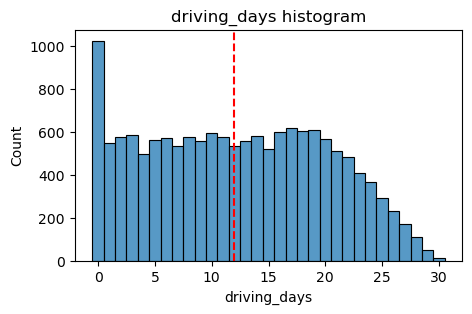

In [112]:
# Histogram of 'driving_days'
plot_histogram('driving_days', median_text=False, discrete=True)

##### **The number of days users drove at least 1 km during the month is almost uniform, and it largely correlates with the number of days they opened the app that month, except the driving_days distribution tails off on the right. However, there were almost twice as many users (~1,000) who did not drive at all during the month. This might seem counterintuitive when considered with activity_days, which showed ~250 users did not open the app at all during the month. This discrepancy might deserve further thought.**


##### **Percent of users by device (iPhone and Android).**

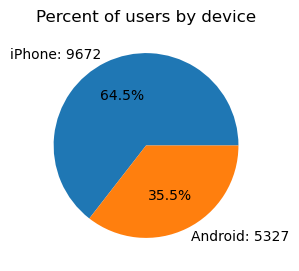

In [115]:
# Pie chart of user by 'device'
fig = plt.figure(figsize=(3,3))
data=df0['device'].value_counts()
plt.pie(data,
        labels=[f'{data.index[0]}: {data.values[0]}',
                f'{data.index[1]}: {data.values[1]}'],
        autopct='%1.1f%%'
        )
plt.title('Percent of users by device');

##### **Retained vs chruned user counts.**

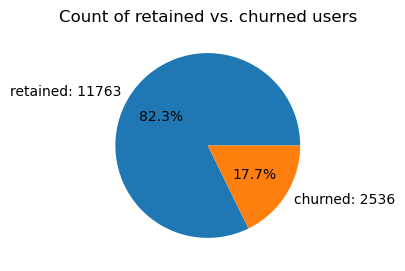

In [117]:
# Pie chart of 'label' (retained vc churned users)
fig = plt.figure(figsize=(3,3))
data=df0['label'].value_counts()
plt.pie(data,
        labels=[f'{data.index[0]}: {data.values[0]}',
                f'{data.index[1]}: {data.values[1]}'],
        autopct='%1.1f%%'
        )
plt.title('Count of retained vs. churned users');

#### **Step 3b: Variable Relationships.**

##### **'driving_days' vs 'activity_days'**

In [120]:
# Confirm the maximum number of days for each variable, driving_days and activity_days.
print('Maximum of driving_days:  ', df0['driving_days'].max())
print('Maximum of activity_days: ', df0['activity_days'].max())

Maximum of driving_days:   30
Maximum of activity_days:  31


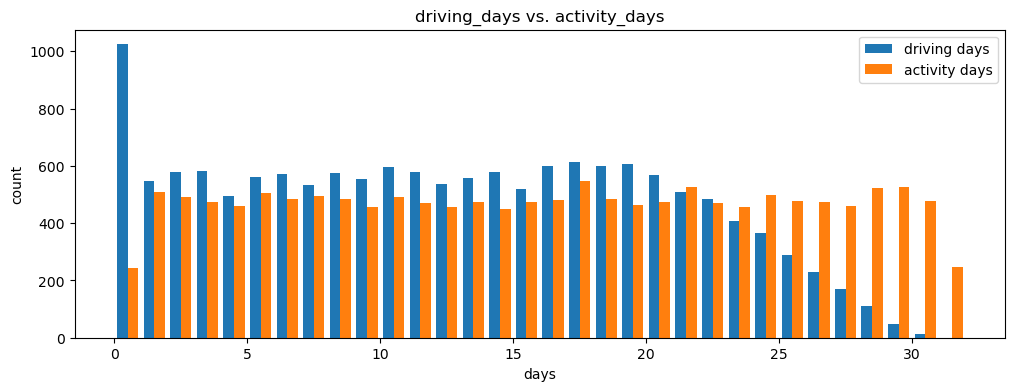

In [121]:
# Histogram 'driving_days' vc 'activity_days'
# This creates one histogram plot with side by side bars (driving_days blue, activity_days orange).
plt.figure(figsize=(12,4))
label=['driving days', 'activity days']
plt.hist([df0['driving_days'], df0['activity_days']],
         bins=range(0,33),
         label=label)
plt.xlabel('days')
plt.ylabel('count')
plt.legend()
plt.title('driving_days vs. activity_days');

##### **This variable relationship might also seems counterintuitive. Nearly two-thirds of the days show that more people drove on a particular day, but opened the app less times on that same day. How could people use the app to drive without opening the app? Perhaps, even though these variables are related to each other, they're *not the same*. It seems worthwhile to contact the data team to get more information about this, especially because it seems that the number of days in the month is not the same between variables is also not the same.**

##### **Scatterplot of 'driving_days' vs. 'activity_days'**

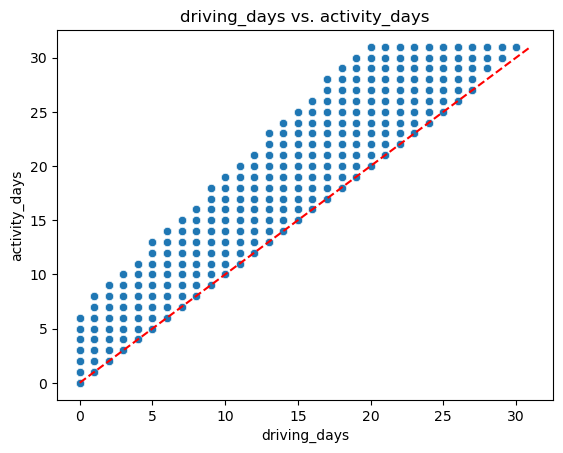

In [124]:
# Scatter plot of 'driving_days vs. activity_days"
# This produces a scatter plot with values increasing upward and to the 
# right, and trend line following this motion).
sns.scatterplot(data=df0, x='driving_days', y='activity_days')
plt.title('driving_days vs. activity_days')
plt.plot([0,31], [0,31], color='red', linestyle='--');

##### **The scatterplot above is encouraging, as we do see driving_days and activity_days roughly correltaed.**

##### **Retention by device.**

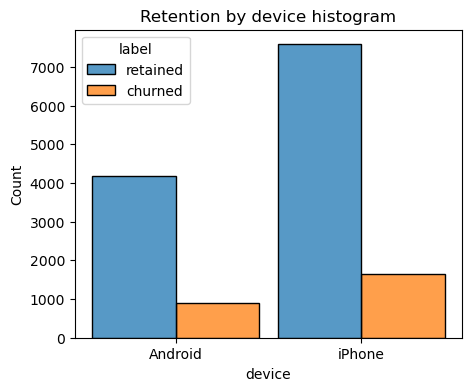

In [127]:
# Histogram of retention by device.
# This produces a histogram with 2 side by side bars for Android, 
# and 2 side by side bars for iPhone.
plt.figure(figsize=(5,4))
sns.histplot(data=df0,
             x='device',
             hue='label',
             multiple='dodge',
             shrink=0.9
             )
plt.title('Retention by device histogram');

##### **The proportion of churned users to retained users is consistent between device types.**

##### **I will egineer a new variable to use in our visualizations and subsequent analysis. Variable name is 'km_per_driving_day' to refer to the number of kilometers driven per day by each user, and is computed by dividing 'driven_km_drives' by 'driving_days.'**

In [130]:
# Create `km_per_driving_day` column
df0['km_per_driving_day'] = df0['driven_km_drives'] / df0['driving_days']
# Call `describe()` on the new column
df0['km_per_driving_day'].describe()

count    1.499900e+04
mean              inf
std               NaN
min      3.022063e+00
25%      1.672804e+02
50%      3.231459e+02
75%      7.579257e+02
max               inf
Name: km_per_driving_day, dtype: float64

##### **There are values of infinity in the engineered variable due to a divide by zero error in the computation, stemming from zero values in 'drives'. Convert the values of infinity to zero.**

In [132]:
# Convert infinite values to zero
df0.loc[df0['km_per_driving_day']==np.inf, 'km_per_driving_day'] = 0
# Confirm that it worked
df0['km_per_driving_day'].describe()

count    14999.000000
mean       578.963113
std       1030.094384
min          0.000000
25%        136.238895
50%        272.889272
75%        558.686918
max      15420.234110
Name: km_per_driving_day, dtype: float64

##### **Churn rate by 'km_per_driving_day'**

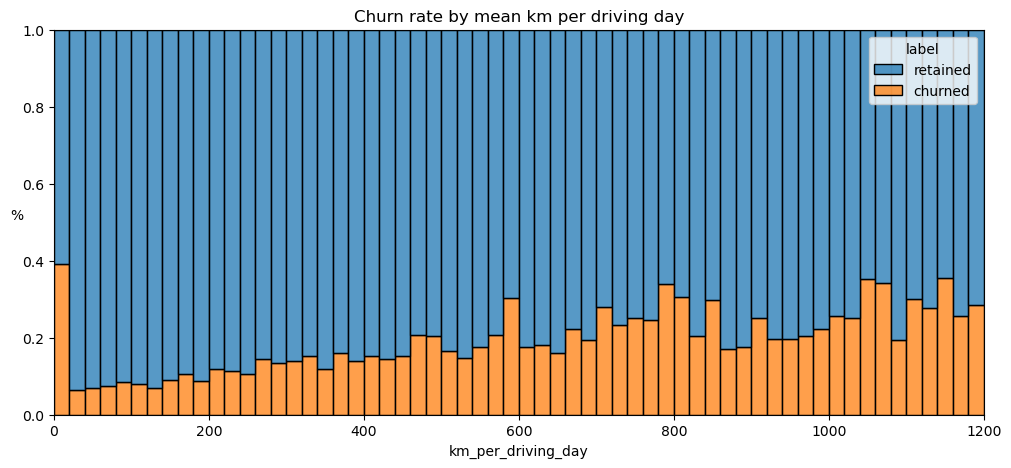

In [134]:
# Histogram of churn rate by mean km per driving day
# This histogram produces a stacked histogram with retained as blue bars 
# uniformly distributed at 1.0, and orange bars stacked within representing
# churned. 
plt.figure(figsize=(12,5))
sns.histplot(data=df0,
             x='km_per_driving_day',
             bins=range(0,1201,20),
             hue='label',
             multiple='fill')
plt.ylabel('%', rotation=0)
plt.title('Churn rate by mean km per driving day');

##### **The above histogram above shows that users who drove further churned more.**

##### **Churn rate per driving day.**

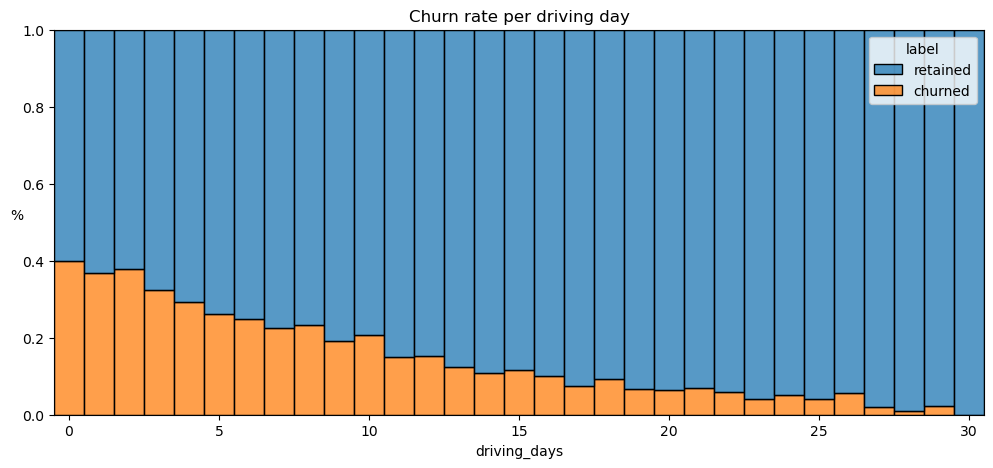

In [137]:
# Histogram of churn rate per driving day
plt.figure(figsize=(12,5))
sns.histplot(data=df0,
             x='driving_days',
             bins=range(1,32),
             hue='label',
             multiple='fill',
             discrete=True)
plt.ylabel('%', rotation=0)
plt.title('Churn rate per driving day');

##### **The 'Churn rate per driving day' histogram above shows that users churned *less* as the number of days they drove during the last month increased. This appears contrary to the 'Churn rate by mean km per driving day' histogram', wich showed as users drove further, they *churned more*. This again could be due to *variable relationships*, or variables *not meaning the same thing*.** 

##### **I shall engineer another variable, 'percent_sessions_in_last_month', to reference the percentage of total user sessions that occurred during the past month, computed by dividing 'sessions' by 'total_sessions'.**

In [140]:
# Create a new column percent_sessions_in_last_month that represents the percentage of 
# each user's total sessions that were logged in their last month.
df0['percent_sessions_in_last_month'] = df0['sessions'] / df0['total_sessions']
# What is the median value of the new column?
print('Percent of total user sessions in the last month:', df0['percent_sessions_in_last_month'].median())

Percent of total user sessions in the last month: 0.42309702992763176


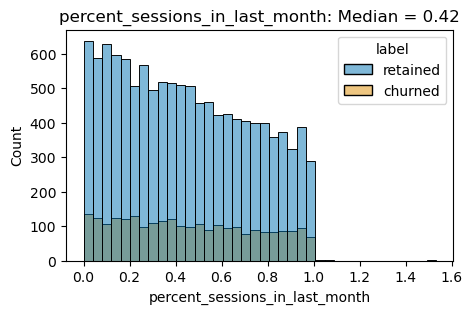

In [141]:
# Histogram of 'percent_sessions_in_last_month'
# This produces a stacked histogram with retained as blue bars, and orange bars stacked
# within representing churned (although showing as grey,
# likely due to the Python environment)
median=round(df0['percent_sessions_in_last_month'].median(), 2)
plt.figure(figsize=(5,3))
sns.histplot(data=df0,
             x='percent_sessions_in_last_month',
             hue=df0['label'],
             multiple='layer',
#             palette=['blue', 'orange'])
             palette='colorblind')
plt.title(f'percent_sessions_in_last_month: Median = {median}');

##### **The median percentage of user sessions in the last month, out of total sessions, is 42%. Although we see the number of user session decrease as this percentage rises, this shows that the data contains a large amount of user sessions in the last month.** 

##### **Check the median value of 'n_days_after_onboarding'.**

In [144]:
# Check the median value of the n_days_after_onboarding variable.
print('Median number of days since onboarding: ', df0['n_days_after_onboarding'].median())

Median number of days since onboarding:  1741.0


##### **Histogram of number days after onboarding for users with 42% or greater sessions in last month.**

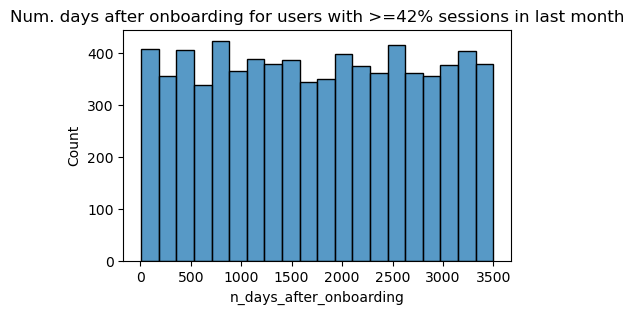

In [146]:
# Histogram of num. days after onboarding for users with >=42% sessions in last month
data = df0.loc[df0['percent_sessions_in_last_month']>=0.42]
plt.figure(figsize=(5,3))
sns.histplot(x=data['n_days_after_onboarding'])
plt.title('Num. days after onboarding for users with >=42% sessions in last month');

##### **Although half of the people in the dataset had 42% or more of their sessions in the last month, the overall median time since onboarding is almost five years. 'n_days_since_onbaording' is a uniform distribution. This is very strange. It's worth asking why so many long-time users suddenly used the app so much in the last month.**


#### **Task 3c. Handling Outliers.**

##### **A nice function for transforming outliers to the 956h percentile value of the respective column.**

In [150]:
def outlier_imputer(column_name, percentile):
    # Calculate threshold
    threshold = df0[column_name].quantile(percentile)
    # Impute threshold for values > than threshold
    df0.loc[df0[column_name] > threshold, column_name] = threshold
    print('{:>25} | percentile: {} | threshold: {}'.format(column_name, percentile, threshold))

##### **Execute the function to transform 'sessions', 'drives', 'total_sessions', 'driven_km_drives', and 'duration_minutes_drives' outlier values to their corresponding 95th percentile values.**
               

In [152]:
for column in ['sessions', 'drives', 'total_sessions',
               'driven_km_drives', 'duration_minutes_drives']:
               outlier_imputer(column, 0.95)

                 sessions | percentile: 0.95 | threshold: 243.0
                   drives | percentile: 0.95 | threshold: 201.0
           total_sessions | percentile: 0.95 | threshold: 454.3632037399997
         driven_km_drives | percentile: 0.95 | threshold: 8889.7942356
  duration_minutes_drives | percentile: 0.95 | threshold: 4668.899348999998


In [153]:
df0.describe()

,ID,sessions,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,activity_days,driving_days,km_per_driving_day,percent_sessions_in_last_month
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,7499.000000,76.568705,64.058204,184.031320,1749.837789,121.605974,29.672512,3939.632764,1789.647426,15.537102,12.179879,578.963113,0.449255
std,4329.982679,67.297958,55.306924,118.600463,1008.513876,148.121544,45.394651,2216.041510,1222.705167,9.004655,7.824036,1030.094384,0.286919
min,0.000000,0.000000,0.000000,0.220211,4.000000,0.000000,0.000000,60.441250,18.282082,0.000000,0.000000,0.000000,0.000000
25%,3749.500000,23.000000,20.000000,90.661156,878.000000,9.000000,0.000000,2212.600607,835.996260,8.000000,5.000000,136.238895,0.196221
50%,7499.000000,56.000000,48.000000,159.568115,1741.000000,71.000000,9.000000,3493.858085,1478.249859,16.000000,12.000000,272.889272,0.423097
75%,11248.500000,112.000000,93.000000,254.192341,2623.500000,178.000000,43.000000,5289.861262,2464.362632,23.000000,19.000000,558.686918,0.687216
max,14998.000000,243.000000,201.000000,454.363204,3500.000000,1236.000000,415.000000,8889.794236,4668.899349,31.000000,30.000000,15420.234110,1.530637


### Step 4 Hypothesis Testing

##### **In this step I will use a hypothesis test to illustrate whether the difference between the mean number of drives for iPhone and Android users is due to chance, or if there is a statistically significant reason for the difference. I will use 5% (0.05) as the significance level. I will *not* attempt to determine the cause for a significant difference, if such a difference is determined. Of course, multiple tests of this nature can be carried out on the variables and their relationships. For simplicity, I shall conduct only the test described here.** 

##### **Convert 'device' from object to integer value for purposes of the test.**

In [157]:
# Encode the categorical 'device' column
df0['device_int'] = df0['device'].map({"iPhone": 1, "Android": 2})
df0[['device', 'device_int']].head()

,device,device_int
0,Android,2
1,iPhone,1
2,Android,2
3,iPhone,1
4,Android,2


##### **As seen above, the 'drives' variable has zero values in some rows, which created division errors. I'll check the number of rows containing zero values.**

In [159]:
# Check for 0 values in drives to avoid possible division errors
count_zeros = (df0['drives'] == 0).sum()
print('Number of 0 values in drives column: ', count_zeros)

Number of 0 values in drives column:  106


##### **Since the number of rows with zero in the drives value comprises only ~0.07%, I shall leave these rows in the dataset, as did the Certificate course.**

In [161]:
# Calculate the mean of drives per device.
df0.groupby('device_int')['drives'].mean()

device_int
1    64.446340
2    63.353482
Name: drives, dtype: float64

#### **Hypotheses for two-sample t-test.**
#### **Null hypothesis:** The difference between average number of drives for iPhone and Android users is due to chance.
#### **Alternate hypothesis:** The difference between average number of drives for iPhone and Android users is NOT due to chance.
#### **Siginifcance level:** 5 percent (0.05)

In [163]:
# Run the hypothesis test.
# Isolate `drives` column for iPhone users.
iPhone = df0[df0['device_int'] == 1]['drives']
# Isolate `drives` column for Android users.
Android = df0[df0['device_int'] == 2]['drives']

# Perform the t-test
stats.ttest_ind(a=iPhone, b=Android, equal_var=False)

TtestResult(statistic=1.1643714136026293, pvalue=0.24429844267242223, df=11148.669519764011)

##### **We see from the output that the p-value is ~0.244, much higher than our significance level of 0.05. Based on this , we *fail to reject* the null hypothesis, and conclude that the difference between the mean number of drives for iPhone and Android users is due to chance.**

### **PACE: Construct**

### **Step 5 Build a Binomial Logistic Regression Model.**

#### **Step 5a: Checking for Outliers.**

##### **Since logistic regression models are not robust to outliers, we shall confirm that the dataset does not have further extreme outlier values.**

In [169]:
df0.describe()

,ID,sessions,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,activity_days,driving_days,km_per_driving_day,percent_sessions_in_last_month,device_int
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,7499.000000,76.568705,64.058204,184.031320,1749.837789,121.605974,29.672512,3939.632764,1789.647426,15.537102,12.179879,578.963113,0.449255,1.355157
std,4329.982679,67.297958,55.306924,118.600463,1008.513876,148.121544,45.394651,2216.041510,1222.705167,9.004655,7.824036,1030.094384,0.286919,0.478577
min,0.000000,0.000000,0.000000,0.220211,4.000000,0.000000,0.000000,60.441250,18.282082,0.000000,0.000000,0.000000,0.000000,1.000000
25%,3749.500000,23.000000,20.000000,90.661156,878.000000,9.000000,0.000000,2212.600607,835.996260,8.000000,5.000000,136.238895,0.196221,1.000000
50%,7499.000000,56.000000,48.000000,159.568115,1741.000000,71.000000,9.000000,3493.858085,1478.249859,16.000000,12.000000,272.889272,0.423097,1.000000
75%,11248.500000,112.000000,93.000000,254.192341,2623.500000,178.000000,43.000000,5289.861262,2464.362632,23.000000,19.000000,558.686918,0.687216,2.000000
max,14998.000000,243.000000,201.000000,454.363204,3500.000000,1236.000000,415.000000,8889.794236,4668.899349,31.000000,30.000000,15420.234110,1.530637,2.000000


##### We see from the above that the 2 engineered fields, **km_per_driving_day** and **percent_sessions_in_last_month**, have very high max values. I'll use the **outlier_imputer** function from above to remove these outliers.

In [171]:
for column in ['km_per_driving_day', 'percent_sessions_in_last_month']:
               outlier_imputer(column, 0.95)

       km_per_driving_day | percentile: 0.95 | threshold: 2237.1506231
percent_sessions_in_last_month | percentile: 0.95 | threshold: 0.9356584345481307


In [172]:
df0[['km_per_driving_day', 'percent_sessions_in_last_month']].describe()

,km_per_driving_day,percent_sessions_in_last_month
count,14999.000000,14999.000000
mean,482.037672,0.447629
std,565.360033,0.283983
min,0.000000,0.000000
25%,136.238895,0.196221
50%,272.889272,0.423097
75%,558.686918,0.687216
max,2237.150623,0.935658


##### **The imputed value above for 'km_per_driving_day' of 2,237 kilometers (~1,390 miles) driven per day is impossible. Although not accounted for in the course, I shall impute this value again, but pass in 0.75 for the 75th percentile.**

In [174]:
for column in ['km_per_driving_day']:
               outlier_imputer(column, 0.75)

       km_per_driving_day | percentile: 0.75 | threshold: 558.6869182124999


In [175]:
df0['km_per_driving_day'].describe()

count    14999.000000
mean       302.942425
std        193.941891
min          0.000000
25%        136.238895
50%        272.889272
75%        558.596076
max        558.686918
Name: km_per_driving_day, dtype: float64

##### **Drop 'ID' since it is not relevant to what is needed.** 

In [177]:
# Drop 'ID' since it is not relevant.
df0 = df0.drop('ID', axis=1)

#### **Step 5b. More Feature Engineering.**

##### **Create a binary feature 'professional_driver' that is a 1 for users who drove 60 or more times in the last month AND drove on 15 or more days in the last month, and a 0 for all other users.**

In [180]:
# Create binary feature 'professional_driver' that is a 1 for users who had 60 or more
# drives and drove on 15+ days in the last month, and 0 for others.
df0['professional_driver'] = np.where((df0['drives']>=60) & (df0['driving_days']>=15), 1, 0)

##### **Check the class balance, and the churn rate for 'professional_driver' (1), and non 'professional_driver' (0).**

In [182]:
# Perform a quick inspection of the new variable.
# Check count of professionals and non-professionals
print(df0['professional_driver'].value_counts())
# Check in-class churn rate
df0.groupby(['professional_driver'])['label'].value_counts(normalize=True)

professional_driver
0    12405
1     2594
Name: count, dtype: int64


professional_driver  label   
0                    retained    0.801202
                     churned     0.198798
1                    retained    0.924437
                     churned     0.075563
Name: proportion, dtype: float64

##### **The churn rate for professional drivers is 7.6%, while the churn rate for non-professionals is 19.9%. This seems like it could add predictive signal to the model.**

##### **Because it was determined during previous EDA that there is no evidence of a non-random cause of the 700 missing values in the **label** column, and because these observations comprise less than 5% of the data, I will drop the rows that are missing this data.**

In [185]:
# Drop rows with missing data in `label` column
df0 = df0.dropna(subset=['label'])

##### **Confirm the rows were dropped (there should now be 14,299 rows).**

In [187]:
# Confirm the rows were dropped. 
df0.shape[0]

14299

##### **Encode the 'label' object variable as integer to use in logistic regression modeling.**

In [189]:
# Encode 'label' as `label_int` for logistic regression training.
df0['label_int'] = df0['label'].map({"churned": 1, "retained": 0})
df0[['label', 'label_int']].head(10)

,label,label_int
0,retained,0
1,retained,0
2,retained,0
3,retained,0
4,retained,0
5,retained,0
6,retained,0
7,retained,0
8,retained,0
9,churned,1


#### **Task 5c. Determine Whether Assumptions Have Been Met.**

##### **Address assumptions for logistic regression:**  
##### **1. Independent observations.**  
##### I will assume that observations are independent for this project.  
##### **2.No extreme outliers.**   
##### This was addressed previously.  
##### **3. Little to no multicollinearity among X predictors.**  
##### I will address this below with a correlation matrix.  
##### **4. Linear relationship between X and the logit of y.**  
##### The last assumption will be verified after modeling.  

##### **This section will be for the correlation matrix.**

In [193]:
# Remove non numeric columns for the correlation heatmap
df_corr = df0.drop(['label', 'device', 'label_int'], axis=1)

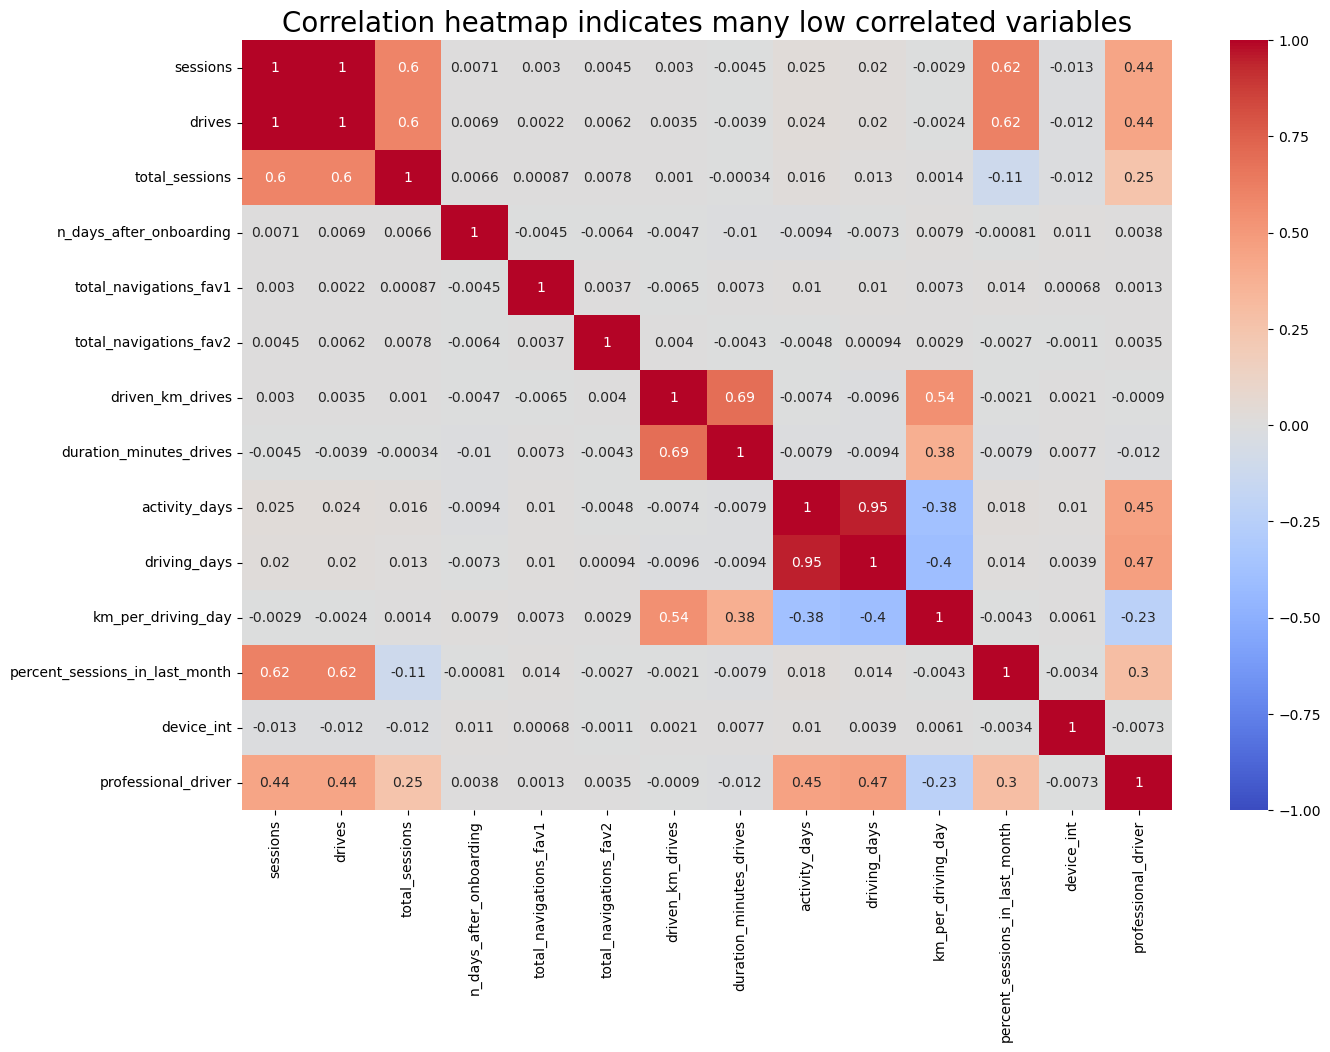

In [194]:
# Plot correlation heatmap
plt.figure(figsize=(15,10))
sns.heatmap(df_corr.corr(method='pearson'), vmin=-1, vmax=1, annot=True, cmap='coolwarm')
plt.title('Correlation heatmap indicates many low correlated variables',
          fontsize=20)
plt.show();

In [195]:
df0.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14299 entries, 0 to 14998
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   label                           14299 non-null  object 
 1   sessions                        14299 non-null  int64  
 2   drives                          14299 non-null  int64  
 3   total_sessions                  14299 non-null  float64
 4   n_days_after_onboarding         14299 non-null  int64  
 5   total_navigations_fav1          14299 non-null  int64  
 6   total_navigations_fav2          14299 non-null  int64  
 7   driven_km_drives                14299 non-null  float64
 8   duration_minutes_drives         14299 non-null  float64
 9   activity_days                   14299 non-null  int64  
 10  driving_days                    14299 non-null  int64  
 11  device                          14299 non-null  object 
 12  km_per_driving_day              14299

#### **Step 5d: Build and Evaluate the Model.**

##### **Split the data into train and test sets.**

In [198]:
# Isolate predictor variables
X = df0.drop(['label', 'label_int', 'device'], axis=1)
# Isolate target variable
y = df0['label_int']

# Perform the train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state = 42)

In [199]:
# Check the number of rows in X_train and X_test.
for x in [X_train, X_test]:
    print(len(x))

10724
3575


##### **Instantiate and fit the model.**

In [201]:
%%time
# Instantiate and fit the model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

CPU times: total: 1.31 s
Wall time: 321 ms


LogisticRegression(max_iter=1000)

##### **Display the model coefficients and the y-intercept.**

In [203]:
# Display the variable coefficients in descending order.
coefficients = pd.Series(model.coef_[0], index=X.columns)
sorted_coefficients = coefficients.abs().sort_values(ascending=False)
print(sorted_coefficients)

activity_days                     0.089271
driving_days                      0.021762
drives                            0.007919
device_int                        0.006562
sessions                          0.004958
percent_sessions_in_last_month    0.002095
total_navigations_fav2            0.001141
total_navigations_fav1            0.001061
professional_driver               0.000786
n_days_after_onboarding           0.000405
total_sessions                    0.000320
duration_minutes_drives           0.000108
km_per_driving_day                0.000028
driven_km_drives                  0.000012
dtype: float64


In [204]:
# Display the y-intercept
model.intercept_

array([-0.00365231])

##### I will call ***predict_proba()*** to generate the probability of response for each sample in the training data. The result will be assigned to the variable ***training_probabilities***. This results in a 2-D array representing observations in ***X_train***. Column 1 is the probability user retained. Column 2 is the probability of  user churned.

In [206]:
# Get the predicted probabilities of the training data
training_probabilities = model.predict_proba(X_train)
training_probabilities

array([[0.93435686, 0.06564314],
       [0.61860144, 0.38139856],
       [0.76755945, 0.23244055],
       ...,
       [0.91316565, 0.08683435],
       [0.83911415, 0.16088585],
       [0.93720399, 0.06279601]])

##### I will plot a regplot where the x-axis represents an independent variable and the y-axis represents the log-odds of the predicted probabilities. (In an exhaustive analysis, this would be plotted for each continuous or discrete predictor variable. Here I show only **activity_days)**.

In [208]:
# Copy the `X_train` dataframe and assign to `logit_data`
logit_data = X_train.copy()
# Create a new `logit` column in the `logit_data` dataframe
logit_data['logit'] = [np.log(prob[1] / prob[0]) for prob in training_probabilities]

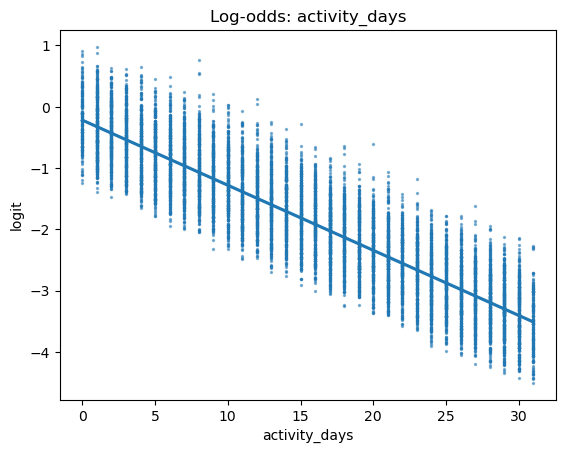

In [209]:
# Plot regplot of `activity_days` log-odds
sns.regplot(x='activity_days', y='logit', data=logit_data, scatter_kws={'s': 2, 'alpha': 0.5})
plt.title('Log-odds: activity_days');

##### **Now let's make predictions on X_test and display the accuracy score.**

In [211]:
%%time
# Generate predictions on X_test
y_preds = model.predict(X_test)

CPU times: total: 0 ns
Wall time: 5.99 ms


In [212]:
# Score the model (default: accuracy) on the test data
print('Accuracy: ', model.score(X_test, y_test))

Accuracy:  0.8251748251748252


##### **Generate a confusion matrix for the logistic regression model.**

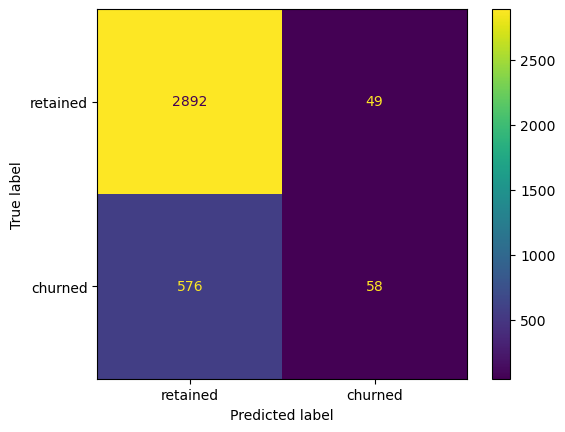

In [214]:
# Generate a confusion matrix for logistic regression model
cm = confusion_matrix(y_test, y_preds)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, 
                              display_labels=['retained', 'churned'],
                              )
disp.plot();

##### **The confusion matrix for the logistic regression model looks good, other than 576 rows (about 16% of the test dataset) were incorrectly predicted as having stayed with the Waze app, but actually churned (false negatives). This is a little concerning for now, but there possibly are ways to improve this metric.**

##### **However, the conventional metrics to review are precision, recall, f1, and accuracy. From the output of the cell below we see that precision is very good at 0.542 (True Positives divided by the sum of True Positives and False Positives). The other metrics appear low.**

##### **Display precision. recall, and f1 scores for the model.**

In [217]:
# Display f1, precision, and recall scores
print('F1:        ', f1_score(y_test, y_preds, pos_label=1))
print('Precision: ', precision_score(y_test, y_preds, pos_label=1))
print('Recall:    ', recall_score(y_test, y_preds, pos_label=1))

Precision:  0.5420560747663551
Recall:     0.0914826498422713
F1:         0.15654520917678813


#### **Feature Importance Report.**

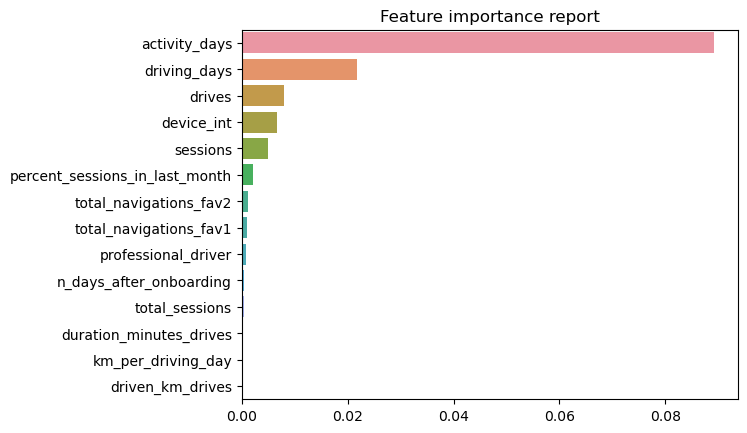

In [219]:
# Generate a feature importance report based on model coefficients..
# Create a list of (column_name, coefficient) tuples
feature_importance = list(zip(X_train.columns, abs(model.coef_[0])))
# Sort the list by coefficient value
feature_importance = sorted(feature_importance, key=lambda x: x[1], reverse=True)

# Plot the feature importances
sns.barplot(x=[x[1] for x in feature_importance],
            y=[x[0] for x in feature_importance],
            orient='h')
plt.title('Feature importance report');

##### **In the feature importance report we see that 'activity_days' is by far the strongest influencer in the logistic regression model's prediciton. 'driving_days' is a strong 2nd influencer in model predictions.**

### **Step 6: Tree-based Modeling - Decision Tree.**

#### **Step 6a: Build the Decision Tree Model.**

In [222]:
# Isolate predictor variables
X = df0.drop(['label', 'label_int', 'device'], axis=1)
# Isolate target variable
y = df0['label_int']

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.25, 
    random_state=42)

In [223]:
# Check the number of rows in X_train and X_test.
for x in [X_train, X_test]:
    print(len(x))

10724
3575


In [224]:
%%time
# Instantiate the model
decision_tree = tree.DecisionTreeClassifier(random_state=42)
# Fit the model to training data
decision_tree.fit(X_train, y_train)

CPU times: total: 312 ms
Wall time: 305 ms


DecisionTreeClassifier(random_state=42)

##### **Make predicition on test data for decision tree model.**

In [226]:
%%time
# Make predictions on test data
dt_pred = decision_tree.predict(X_test)

CPU times: total: 0 ns
Wall time: 2.99 ms


#### **Step 6b: Model Evaluation.**
##### **Now let's review the model's scoring metrics.**

In [228]:
# Print out the test scores for decision tree model.
print("F1 Score:", "%.3f" % f1_score(y_test, dt_pred))
print("Precision:", "%.3f" % precision_score(y_test, dt_pred))
print("Recall:", "%.3f" % recall_score(y_test, dt_pred))
print("Accuracy:", "%.3f" % accuracy_score(y_test, dt_pred))

F1 Score: 0.268
Precision: 0.260
Recall: 0.276
Accuracy: 0.733


##### **Generate the confusion matrix for decision tree model.**

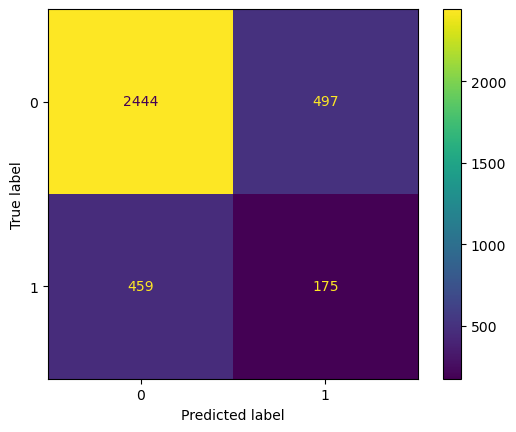

In [230]:
# Construct the confusion matrix for decision tree test data.
cm = confusion_matrix(y_test, dt_pred)
# Create the display for your confusion matrix.
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=decision_tree.classes_)
# Plot the visual in-line.
disp.plot()

##### **The confusion matrix above looks good. It should be noted again however, that there are 459 false negatives (about 13% of the test data y_test) that were predicted to stay, but actually churned. There were also about the same amount of false positives (predicted to churn but actually stayed).** 

##### **However, this is an improvement over the logistic regression model (around 16% of false negatives and false positives comprised the test dataset). This improvement is evidenced in better f1 and recall scores, although precision and accuracy declined.** 

##### **Plot the Decision Tree.**

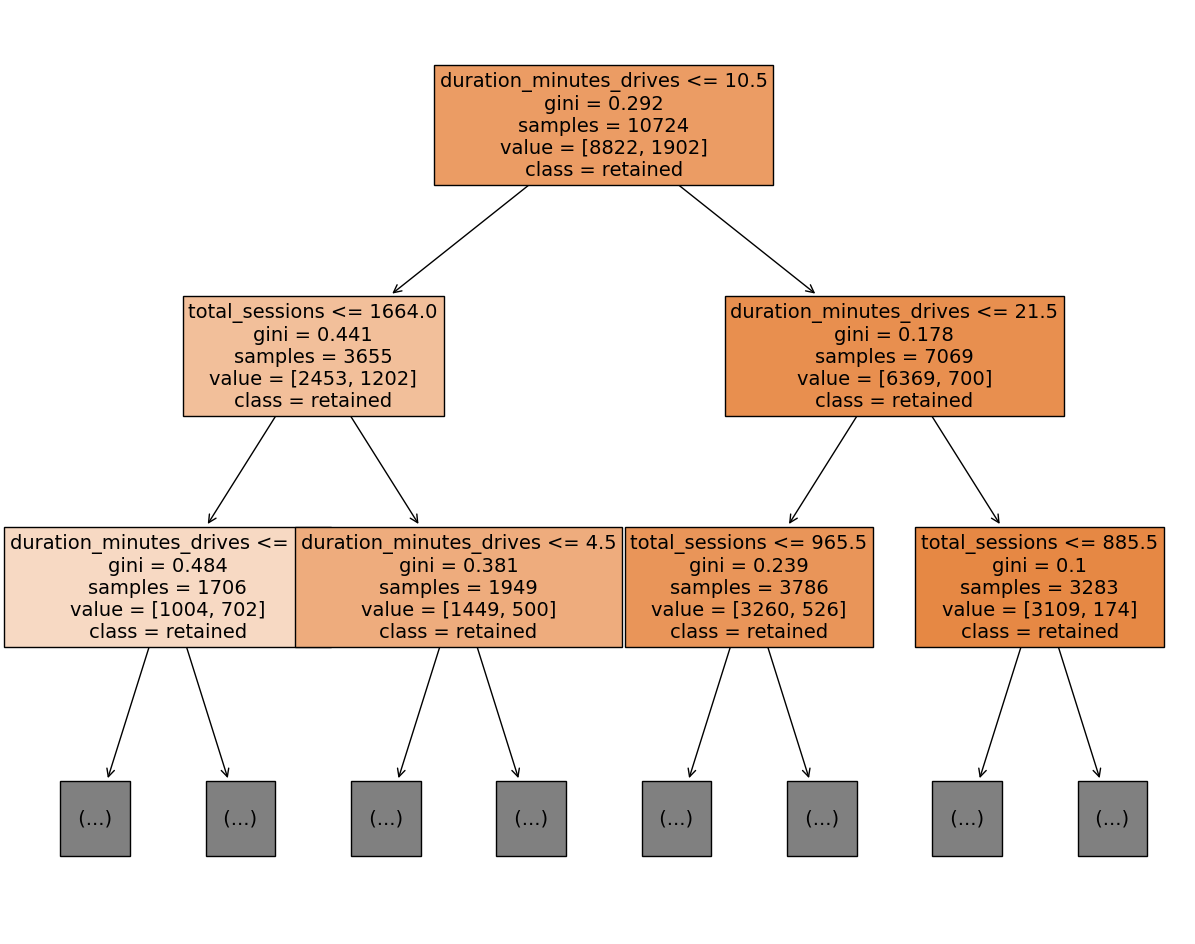

In [233]:
# Define the class_names list for plot_tree
class_names = list({0: 'retained', 1: 'churned'}.values())
plt.figure(figsize=(15,12))
tree.plot_tree(decision_tree, max_depth=2, fontsize=14, feature_names=['label', 'sessions', 
                                                                       'drives', 'total_sessions',
                                                                       'n_days_after_onboarding',  
                                                                       'total_navigations_fav1',
                                                                       'total_navigations_fav2', 
                                                                       'driven_km_drives',
                                                                       'duration_minutes_drives',
                                                                       'activity_days driving_days',
                                                                       'device',
                                                                       'km_per_driving_day'
                                                                       'percent_sessions_in_last_month',
                                                                       'professional_driver'], 
           class_names=class_names, filled=True);
plt.show()

##### **As can be the case with tree-based models, these results are somewhat diffcult to interpret. What I see is that the splits are based on 'duration_minutes_drives' and 'total_sessions.' However, the values shown for the variable split points appear ambiguous.** 

### **Step 7: Tree-based Modeling - Random Forest.**

#### **Step 7a: Additional Feature Engineering.**

##### **Note that in the Certificate course, these variables were engineered, but NOT transformed in any way to account for outliers. Therefore, I shall save a copy of the data that does not contain the adjustments for outliers ('df0_not_adj'), to compare with the transformed data later in this project.**
##### **Then I will create a variable 'total_sessions_per_day' that is the mean number of sessions per day since the user began using the app, computed by dividing 'total_sessions' by 'n_days_after_onboarding'.**

In [238]:
# Make a copy of df0 where the engineered variables in this section are not transformed
# for outliers.
df0_not_adj = df0.copy()

##### **'total_sessions_per_day**

In [240]:
# Create `total_sessions_per_day` feature for both 'df0' and 'df0_not_adj'
df0['total_sessions_per_day'] =  df0['total_sessions'] / df0['n_days_after_onboarding']
df0_not_adj['total_sessions_per_day'] =  df0['total_sessions'] / df0['n_days_after_onboarding']
df0['total_sessions_per_day'].describe()

count    14299.000000
mean         0.329996
std          1.292124
min          0.000298
25%          0.050818
50%          0.100457
75%          0.208580
max         39.763874
Name: total_sessions_per_day, dtype: float64

##### **The max value 39 seems excessive given the other values. I will count the number of rows roughly above the 75th percentile to determine if we need to transform possible outlier values.**

In [242]:
# Determine how many column values are above the specified threshold
column_name = 'total_sessions_per_day'
threshold = 1  

# Count values greater than the threshold
count = len(df0[df0[column_name] > threshold])

print('Number of values greater than', threshold, ':', count)
percentage = count / 14299
print('Percentage of values greater than', threshold, ':', percentage)

Number of values greater than 1 : 753
Percentage of values greater than 1 : 0.052661025246520735


##### **It appears that only 5% of the values in the 'total_sessions_per_day' column have extreme outliers. Therefore, I shalll NOT alter this variable**

##### **'km_per_hour**

##### **Create 'km_per_hour' feature that is the number of kilometers the user drove per hour in the last month, computed by dividing the quotient of 'driven_km_drives' and 'duration_minutes_drives', by 60.**

In [246]:
# Create `km_per_hour` feature for both 'df0' and 'df0_not_adj'
df0['km_per_hour'] = df0['driven_km_drives'] / (df0['duration_minutes_drives'] / 60)
df0_not_adj['km_per_hour'] = df0['driven_km_drives'] / (df0['duration_minutes_drives'] / 60)
df0['km_per_hour'].describe()

count    14299.000000
mean       189.443929
std        327.406274
min         72.013095
25%         92.887853
50%        121.231277
75%        191.157779
max      21800.540069
Name: km_per_hour, dtype: float64

##### **The max value 21,800 kilometers per hour is excessive given the other values. Even the values above the median of 121 km/hr (roughly 75mph) seem ridiculous, as this implies a user drove roughly 75 miles on every hour of his drives. I will count the number of rows roughly above the median (about 121) to determine if we need to transform these values.**

In [248]:
# Determine how many column values are above the specified threshold
column_name = 'km_per_hour'
threshold = 121  

# Count values greater than the threshold
count = len(df0[df0[column_name] > threshold])

print('Number of values greater than', threshold, ':', count)
percentage = count / 14299
print('Percentage of values greater than', threshold, ':', percentage)

Number of values greater than 121 : 7166
Percentage of values greater than 121 : 0.5011539268480313


##### **Half of the values in the engineered 'km_per_hour' column appear extreme. Despite the Certificate course not transforming outliers due to tree-based models being robust to them, I will transform this variable to cap at the median value by calling the *outlier_imputer* function defined previously.**  

In [250]:
# Account for outliers in df0['km_per_hour'] by capping the variable at the median value.
for column in ['km_per_hour']:
               outlier_imputer(column, 0.5)

              km_per_hour | percentile: 0.5 | threshold: 121.23127704343584


##### **Check the distribution after the transformation.**

In [252]:
# Check the distribution of 'km_per_hour' after transformation.
df0['km_per_hour'].describe()

count    14299.000000
mean       107.714250
std         16.879685
min         72.013095
25%         92.887853
50%        121.231277
75%        121.231277
max        121.231277
Name: km_per_hour, dtype: float64

##### **'km_per_drive'**

##### **Create 'km_per_drive' feature that is the mean number of kilometers a user drove per drive during the past month, computed by dividing 'driven_km_drives' by 'drives'.**

In [255]:
# Create `km_per_drive` feature for both 'df0' and 'df0_not_adj'
df0['km_per_drive'] = df0['driven_km_drives'] / df0['drives']
df0_not_adj['km_per_drive'] = df0['driven_km_drives'] / df0['drives']
df0['km_per_drive'].describe()

count    1.429900e+04
mean              inf
std               NaN
min      1.008775e+00
25%      3.365506e+01
50%      7.429025e+01
75%      1.828194e+02
max               inf
Name: km_per_drive, dtype: float64

##### **Again, correct the infinite values to zero.**

In [258]:
# Correct infinite values that resulted from divide by 0 error due to 0 values in 'drves'. 
# (Convert infinte values to 0).
# Do this for both 'df0' and 'df0_not_adj'.
df0.loc[df0['km_per_drive']==np.inf, 'km_per_drive'] = 0
df0_not_adj.loc[df0_not_adj['km_per_drive']==np.inf, 'km_per_drive'] = 0

In [260]:
# Confirm the correction for 'df0'
df0['km_per_drive'].describe()

count    14299.000000
mean       225.792784
std        572.402205
min          0.000000
25%         32.899109
50%         72.319628
75%        177.431844
max       8889.794236
Name: km_per_drive, dtype: float64

In [262]:
# Confirm the correction for 'df0_not_adj'
df0_not_adj['km_per_drive'].describe()

count    14299.000000
mean       225.792784
std        572.402205
min          0.000000
25%         32.899109
50%         72.319628
75%        177.431844
max       8889.794236
Name: km_per_drive, dtype: float64

##### **The max value of nearly 9,000 kilometers (roughly 5,625 miles) seems impossible for any driver to complete. As above, I will determine whether to transform this variable by counting the number of values above an arbitrary value, say 800 (800 kilometers = 500 miles, assuming someone drove for roughly 8 hours at 60 mph).** 

In [264]:
# Determine how many column values are above the specified threshold
column_name = 'km_per_drive'
threshold = 800  

# Count values greater than the threshold
count = len(df0[df0[column_name] > threshold])

print('Number of values greater than', threshold, ':', count)
percentage = count / 14299
print('Percentage of values greater than', threshold, ':', percentage)

Number of values greater than 800 : 843
Percentage of values greater than 800 : 0.058955171690328


#####  **Since the percentage of values greater than the arbitrary limit set above is only 5%, I shall not alter the values in this variable.**

##### **'percent_of_sessions_to_favorite'**

##### **Create 'percent_of_sessions_to_favorite' feature that is the percentage of a users total sessions that the user drove to their first and second favorite destination, computed by dividing the sum of 'total_navigations_fav1' and 'total_navigations_fav2' by 'total_sessions'**

In [266]:
# Create `percent_of_sessions_to_favorite` feature for both 'df0' and 'df0_not_adj'
df0['percent_of_sessions_to_favorite'] = (
    df0['total_navigations_fav1'] + df0['total_navigations_fav2']) / df0['total_sessions']
df0_not_adj['percent_of_sessions_to_favorite'] = (
    df0['total_navigations_fav1'] + df0['total_navigations_fav2']) / df0['total_sessions']

# Get descriptive stats
df0['percent_of_sessions_to_favorite'].describe()

count    14299.000000
mean         1.679311
std          9.020891
min          0.000000
25%          0.212409
50%          0.658977
75%          1.644431
max        777.563629
Name: percent_of_sessions_to_favorite, dtype: float64

##### **The max values of 777% for 'percent_of_sessions_to_favorite' is very high. In fact, any value greater than 1.0 (100%) does not make sense. I will therefore investigate this, as done above.**

In [268]:
# Determine how many column values are above the specified threshold
column_name = 'percent_of_sessions_to_favorite'
threshold = 1.0 

# Count values greater than the threshold
count = len(df0[df0[column_name] > threshold])

print('Number of values greater than', threshold, ':', count)
percentage = count / 14299
print('Percentage of values greater than', threshold, ':', percentage)

Number of values greater than 1.0 : 5495
Percentage of values greater than 1.0 : 0.38429260787467656


##### **We see that approximately 38% of the values of this variable are greater than 1.0 (100%). I will cap the value at the 75th percentile (about 1.64). Using the 75th percentile allows us to avoid having to write new code to cap the values at the numerical value 1.0, and avoids some loss of data.** 

In [270]:
# Account for outliers in df0['percent_of_sessions_to_favorite'] by capping the variable
# at the 75th percentile.
for column in ['percent_of_sessions_to_favorite']:
               outlier_imputer(column, 0.75)

percent_of_sessions_to_favorite | percentile: 0.75 | threshold: 1.6444311495477253


#### **Step 7b: Construct and Evaluate Random Forest Model WITHOUT Outliers.**
#### **This model will use the data with engineered features adjusted for outliers ('df0').**

In [273]:
# Isolate predictor variables
X = df0.drop(['label', 'label_int', 'device'], axis=1)
# Isolate target variable
y = df0['label_int']

# Split into train and test sets
X_tr, X_test, y_tr, y_test = train_test_split(X, y, stratify=y, test_size=0.2, 
    random_state=42)
# 4. Split into train and validate sets
X_train, X_val, y_train, y_val = train_test_split(X_tr, y_tr, stratify=y_tr, test_size=0.25,
    random_state=42)

In [275]:
# Check the number of rows in X_train, X_val, and X_test.
for x in [X_train, X_val , X_test]:
    print(len(x))

8579
2860
2860


In [277]:
# Custom scroing function
def custom_scoring(estimator, X, y):
    f1 = f1_score(y, estimator.predict(X))
    precision = precision_score(y, estimator.predict(X))
    recall = recall_score(y, estimator.predict(X))
    accuracy = accuracy_score(y, estimator.predict(X))
    
    return {'f1': f1, 'precision': precision, 'recall': recall, 'accuracy': accuracy}

In [279]:
%%time
# Instantiate model
rf = RandomForestClassifier(random_state=42)

# Assign dictionary of hyperparameters
cv_params = {'max_depth': [5], 
             'max_features': [1.0],
             'max_samples': [1.0],
             'min_samples_leaf': [2],
             'min_samples_split': [2],
             'n_estimators': [300],
             }  

# Instantiate GridSearch
rf_cv = GridSearchCV(rf, cv_params, scoring=custom_scoring, cv=4, refit='recall')

CPU times: total: 0 ns
Wall time: 0 ns


In [281]:
%%time
# Fit the model to the training data.
rf_cv.fit(X_train, y_train) 

CPU times: total: 1min 48s
Wall time: 1min 48s


GridSearchCV(cv=4, estimator=RandomForestClassifier(random_state=42),
             param_grid={'max_depth': [5], 'max_features': [1.0],
                         'max_samples': [1.0], 'min_samples_leaf': [2],
                         'min_samples_split': [2], 'n_estimators': [300]},
             refit='recall',
             scoring=<function custom_scoring at 0x00000249F482A660>)

In [283]:
# Examine best score
rf_cv.best_score_

0.06371391076115486

In [285]:
# Display as a dataframe the best mean test scores on rf_cv

mean_test_f1 = rf_cv.cv_results_['mean_test_f1']
f1 = mean_test_f1[0]
mean_test_precision = rf_cv.cv_results_['mean_test_precision']
precision = mean_test_precision[0]
mean_test_recall = rf_cv.cv_results_['mean_test_recall']
recall = mean_test_recall[0]
mean_test_accuracy = rf_cv.cv_results_['mean_test_accuracy']
accuracy = mean_test_accuracy[0]

table = pd.DataFrame({'model': 'rf_cv',
                          'f1': [f1],
                          'precision': [precision], 
                          'recall': [recall],
                          'accuracy': [accuracy]
                          
                         })
  
table

,model,f1,precision,recall,accuracy
0,rf_cv,0.113389,0.541977,0.063714,0.824222


##### **This function extracts all the scores from a model's predictions.**

In [287]:
def get_scores(model_name:str, model, X_test_data, y_test_data):
    '''
    Generate a table of test scores.

    In: 
        model_name (string):  How you want your model to be named in the output table
        model:                A fit GridSearchCV object
        X_test_data:          numpy array of X_test data
        y_test_data:          numpy array of y_test data

    Out: pandas df of precision, recall, f1, accuracy, and AUC scores for your model
    '''

    preds = model.best_estimator_.predict(X_test_data)

    f1 = f1_score(y_test_data, preds)
    precision = precision_score(y_test_data, preds)
    recall = recall_score(y_test_data, preds)
    accuracy = accuracy_score(y_test_data, preds)
    
    table = pd.DataFrame({'model': [model_name],
                          'f1': [f1],
                          'precision': [precision], 
                          'recall': [recall],
                          'accuracy': [accuracy]
                          
                         })
  
    return table

##### **Now I will use the function above to get the best performing model's predictions on the test set.**

In [289]:
# Get predictions on test data
rf_test_scores = get_scores('random forest test', rf_cv, X_test, y_test)
rf_test_scores

,model,f1,precision,recall,accuracy
0,random forest test,0.10302,0.517857,0.057199,0.823427


##### **Generate a confusion matrix for the test data of the random forest model with outliers.**

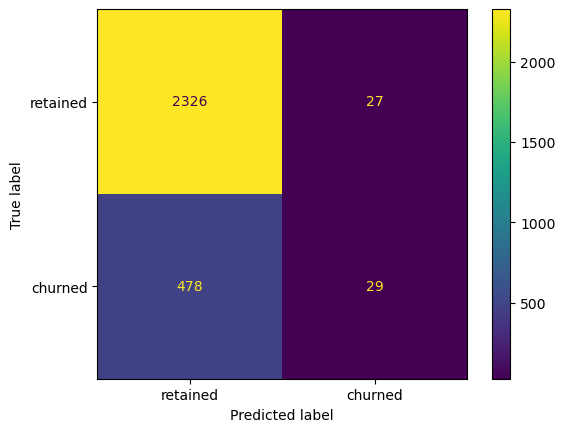

In [291]:
# Generate confusion matrix for the test data.
y_preds = rf_cv.best_estimator_.predict(X_test)
cm = confusion_matrix(y_test, y_preds)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, 
                              display_labels=['retained', 'churned'],
                              )
disp.plot();

##### **The confusion matrix above again has a larger number of false negatives at 478, or about 16% of the test dataset (y_test), that were predicted as NOT abandoning the app when in fact they did so. This percentage is similar to the logistic regression model.**

##### **We see that the fi and precision are similar to the logistic regression model, but recall is surprisingly low.** 

#### **Feature Importance Report.**

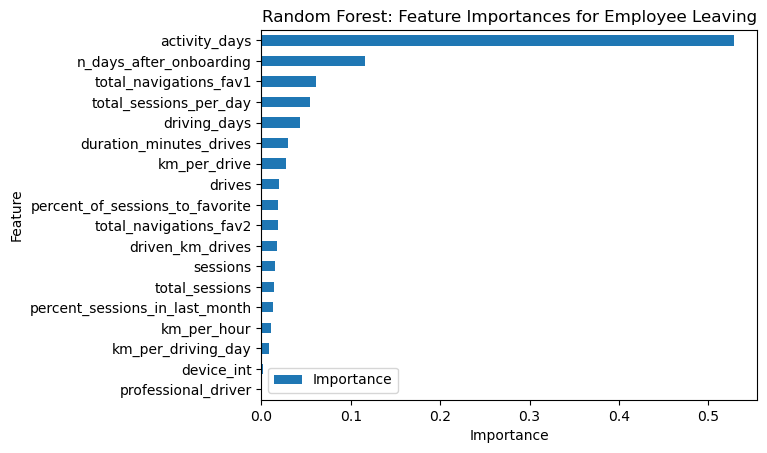

In [293]:
# Get feature importances
feat_impt = rf_cv.best_estimator_.feature_importances_

# Create feature importance report.
# Get indices of top 10 features
ind = np.argpartition(rf_cv.best_estimator_.feature_importances_, -18)[-18:]

# Get column labels of top 10 features 
feat = X.columns[ind]

# Filter `feat_impt` to consist of top 10 feature importances
feat_impt = feat_impt[ind]

y_df = pd.DataFrame({"Feature":feat,"Importance":feat_impt})
y_sort_df = y_df.sort_values("Importance")
fig = plt.figure()
ax1 = fig.add_subplot(111)

y_sort_df.plot(kind='barh',ax=ax1,x="Feature",y="Importance")

ax1.set_title("Random Forest: Feature Importances for Employee Leaving", fontsize=12)
ax1.set_ylabel("Feature")
ax1.set_xlabel("Importance")

plt.show()

#### **Step 7c: Construct and Evaluate Random Forest Model WITH Outliers.**
#### **This model will use the data with engineered features NOT adjusted for outliers (df0_not_adj).**

In [296]:
# Check the integrity of df0_not_adj
df0_not_adj.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14299 entries, 0 to 14998
Data columns (total 21 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   label                            14299 non-null  object 
 1   sessions                         14299 non-null  int64  
 2   drives                           14299 non-null  int64  
 3   total_sessions                   14299 non-null  float64
 4   n_days_after_onboarding          14299 non-null  int64  
 5   total_navigations_fav1           14299 non-null  int64  
 6   total_navigations_fav2           14299 non-null  int64  
 7   driven_km_drives                 14299 non-null  float64
 8   duration_minutes_drives          14299 non-null  float64
 9   activity_days                    14299 non-null  int64  
 10  driving_days                     14299 non-null  int64  
 11  device                           14299 non-null  object 
 12  km_per_driving_day     

In [298]:
# And get descriptive statistics as well.
df0_not_adj.describe()

,sessions,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,activity_days,driving_days,km_per_driving_day,percent_sessions_in_last_month,device_int,professional_driver,label_int,total_sessions_per_day,km_per_hour,km_per_drive,percent_of_sessions_to_favorite
count,14299.000000,14299.000000,14299.000000,14299.000000,14299.000000,14299.000000,14299.000000,14299.000000,14299.000000,14299.000000,14299.000000,14299.000000,14299.000000,14299.000000,14299.000000,14299.000000,14299.000000,14299.000000,14299.000000
mean,76.539688,64.014546,183.663233,1751.822505,121.747395,29.638296,3944.110515,1792.947170,15.544653,12.182530,302.973449,0.448193,1.354850,0.173998,0.177355,0.329996,189.443929,225.792784,1.679311
std,67.243178,55.251272,118.596924,1008.663834,147.713428,45.350890,2217.358063,1224.414221,9.016088,7.833835,194.061820,0.283898,0.478485,0.379121,0.381982,1.292124,327.406274,572.402205,9.020891
min,0.000000,0.000000,0.220211,4.000000,0.000000,0.000000,60.441250,18.282082,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000298,72.013095,0.000000,0.000000
25%,23.000000,20.000000,90.457733,878.500000,10.000000,0.000000,2217.319909,840.181344,8.000000,5.000000,136.168003,0.196890,1.000000,0.000000,0.000000,0.050818,92.887853,32.899109,0.212409
50%,56.000000,48.000000,158.718571,1749.000000,71.000000,9.000000,3496.545617,1479.394387,16.000000,12.000000,273.301012,0.424310,1.000000,0.000000,0.000000,0.100457,121.231277,72.319628,0.658977
75%,111.000000,93.000000,253.540450,2627.500000,178.000000,43.000000,5299.972162,2466.928876,23.000000,19.000000,558.018761,0.687251,2.000000,0.000000,0.000000,0.208580,191.157779,177.431844,1.644431
max,243.000000,201.000000,454.363204,3500.000000,1236.000000,415.000000,8889.794236,4668.899349,31.000000,30.000000,558.686918,0.935658,2.000000,1.000000,1.000000,39.763874,21800.540069,8889.794236,777.563629


In [300]:
# Isolate predictor variables
X = df0_not_adj.drop(['label', 'label_int', 'device'], axis=1)
# Isolate target variable
y = df0_not_adj['label_int']

# Split into train and test sets
X_tr, X_test, y_tr, y_test = train_test_split(X, y, stratify=y, test_size=0.2, 
    random_state=42)
# 4. Split into train and validate sets
X_train, X_val, y_train, y_val = train_test_split(X_tr, y_tr, stratify=y_tr, test_size=0.25,
    random_state=42)

In [302]:
# Check the number of rows in X_train, X_val, and X_test.
for x in [X_train, X_val , X_test]:
    print(len(x))

8579
2860
2860


In [304]:
# Custom scroing function
def custom_scoring(estimator, X, y):
    f1 = f1_score(y, estimator.predict(X))
    precision = precision_score(y, estimator.predict(X))
    recall = recall_score(y, estimator.predict(X))
    accuracy = accuracy_score(y, estimator.predict(X))
    
    return {'f1': f1, 'precision': precision, 'recall': recall, 'accuracy': accuracy}

In [306]:
%%time
# Instantiate model
rf = RandomForestClassifier(random_state=42)

# Assign dictionary of hyperparameters
cv_params = {'max_depth': [5], 
             'max_features': [1.0],
             'max_samples': [1.0],
             'min_samples_leaf': [2],
             'min_samples_split': [2],
             'n_estimators': [300],
             }  

# Instantiate GridSearch
rf_cv = GridSearchCV(rf, cv_params, scoring=custom_scoring, cv=4, refit='recall')

CPU times: total: 0 ns
Wall time: 0 ns


In [308]:
%%time
rf_cv.fit(X_train, y_train) 

CPU times: total: 1min 57s
Wall time: 1min 57s


GridSearchCV(cv=4, estimator=RandomForestClassifier(random_state=42),
             param_grid={'max_depth': [5], 'max_features': [1.0],
                         'max_samples': [1.0], 'min_samples_leaf': [2],
                         'min_samples_split': [2], 'n_estimators': [300]},
             refit='recall',
             scoring=<function custom_scoring at 0x00000249FA605940>)

In [310]:
# Display as a dataframe the best mean test scores on rf_cv

mean_test_f1 = rf_cv.cv_results_['mean_test_f1']
f1 = mean_test_f1[0]
mean_test_precision = rf_cv.cv_results_['mean_test_precision']
precision = mean_test_precision[0]
mean_test_recall = rf_cv.cv_results_['mean_test_recall']
recall = mean_test_recall[0]
mean_test_accuracy = rf_cv.cv_results_['mean_test_accuracy']
accuracy = mean_test_accuracy[0]

table = pd.DataFrame({'model': 'rf_cv',
                          'f1': [f1],
                          'precision': [precision], 
                          'recall': [recall],
                          'accuracy': [accuracy]
                          
                         })
  
table

,model,f1,precision,recall,accuracy
0,rf_cv,0.115656,0.551317,0.065026,0.824688


##### **As above, this function extracts all the scores from a model's predictions. I want to re-run the definition to make certain the current values are in memory**

In [312]:
def get_scores(model_name:str, model, X_test_data, y_test_data):
    '''
    Generate a table of test scores.

    In: 
        model_name (string):  How you want your model to be named in the output table
        model:                A fit GridSearchCV object
        X_test_data:          numpy array of X_test data
        y_test_data:          numpy array of y_test data

    Out: pandas df of precision, recall, f1, accuracy, and AUC scores for your model
    '''

    preds = model.best_estimator_.predict(X_test_data)

    f1 = f1_score(y_test_data, preds)
    precision = precision_score(y_test_data, preds)
    recall = recall_score(y_test_data, preds)
    accuracy = accuracy_score(y_test_data, preds)
    
    table = pd.DataFrame({'model': [model_name],
                          'f1': [f1],
                          'precision': [precision], 
                          'recall': [recall],
                          'accuracy': [accuracy]
                          
                         })
  
    return table

##### **Again I will use the function above to get the best performing model's predictions on the test set (Random Forest with outliers).**

In [318]:
# Get predictions on test data
rf_test_scores = get_scores('random forest test', rf_cv, X_test, y_test)
rf_test_scores

,model,f1,precision,recall,accuracy
0,random forest test,0.102655,0.5,0.057199,0.822727


##### **Again, generate a confusion matrix for the test data of the random forest model.**

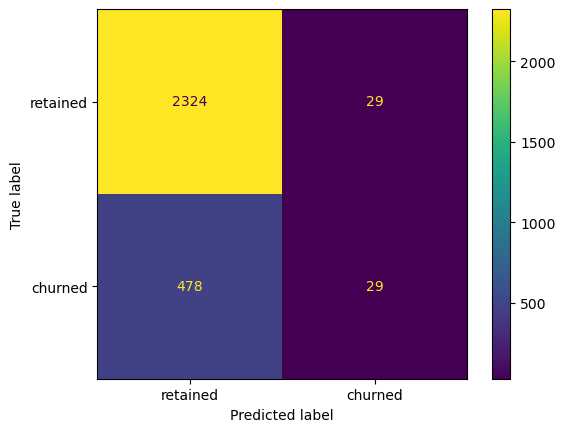

In [320]:
# Generate confusion matrix for the test data.
y_preds = rf_cv.best_estimator_.predict(X_test)
cm = confusion_matrix(y_test, y_preds)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, 
                              display_labels=['retained', 'churned'],
                              )
disp.plot();

##### **This confusion matrix with the outliers left in place, is very similar to the matrix without outliers. This seems to demonstrate the robustness of tree-based models to outliers.  Again there is that mild concern regarding the number of false negatives being exactly the same at 478, or about 16% of the test dataset (y_test), that were predicted as NOT abandoning the app when in fact they did.** 

##### **As we see above, the random forest model with outliers performed slightly worse than the model with the outliers adjusted, which is surprising. In fact, the random forest models don't seem to perform as well as I had expected.**

#### **Feature importance Report.**

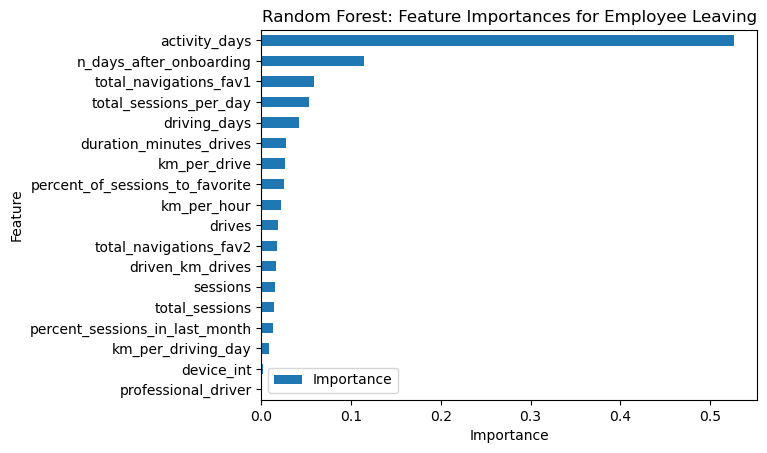

In [322]:
# Get feature importances
feat_impt = rf_cv.best_estimator_.feature_importances_

# Create feature importance report.
# Get indices of top 10 features
ind = np.argpartition(rf_cv.best_estimator_.feature_importances_, -18)[-18:]

# Get column labels of top 10 features 
feat = X.columns[ind]

# Filter `feat_impt` to consist of top 10 feature importances
feat_impt = feat_impt[ind]

y_df = pd.DataFrame({"Feature":feat,"Importance":feat_impt})
y_sort_df = y_df.sort_values("Importance")
fig = plt.figure()
ax1 = fig.add_subplot(111)

y_sort_df.plot(kind='barh',ax=ax1,x="Feature",y="Importance")

ax1.set_title("Random Forest: Feature Importances for Employee Leaving", fontsize=12)
ax1.set_ylabel("Feature")
ax1.set_xlabel("Importance")

plt.show()

##### **The feature importance report shows the consistency that 'activity_days' is the strongest influencer in model predicitions, with some differing predictors at some levels ('driving_days' is now ranked 5th instead of 2nd as it was in the logistic regression model).** 

### **PACE: Execute.**

### **Conclusin - Key Findings and Recommendations.**

#### **Key findings from this project.**
#### **(Please note that values given are approximations).**
##### **1. Users who use Waze drive a lot. In the past month, half the users drove over 3,495 kilometers (2,172 miles), and drove for over 1,478 minutes (25 hours).**
##### **2. Roughly 83% of users stayed with the app, and about 17% of users churned.**
##### **3. Median distance all users drove is ~73 kilometers. However, users who churned drove further and much more often than users who did not churn.**
##### **4. Churn rate by device is roughly proportional.**
#### **Recommendations.**
##### **1. It would be prudent to consult the data team as to why the 'driving_days' variable has a max value of 30 days, but the 'activity_days' variable has a max value of 31 days.** 
##### **2. We should also ask why so many of the user sessions occurred within the last month, and why it appears so many of these sessions are from users who began using the app roughly 5 years ago (the question becomes why did so many long-term users suddenly start using the app?).**  

##### **3. Of the 3 models that were constructed (logistic regression, decision tree, random forest), and based on the current iteration of the code, it appears right now the decision tree is the most successful at predicting user churn. This is surprising. The decision tree had the best F1 and recall. However, the logistic regression had the best precision, followed closely by random forest (see the chart below).**
| Model |	F1	| Precision	| Recall | Accuracy |
|---|---|---|---|---|
| Logistic Regr | 0.156 | 0.542 | 0.091 | 0.825 |
| Decision Tree	| 0.260	| 0.268	| 0.276	| 0.733 |
| Random Forest no Outliers | 0.103 | 0.517 | 0.057 | 0.823 | 
| Random Forest with outliers | 0.102 | 0.500 | 0.057 | 0.822 |                        	
##### **4. Based on this, I would not recommend any of these models to be used in a production environment. However, they could be used for further exploration, and can be improved upon. We could also obtain more granular data (drive times, geographic location), to further improve our predictive model.**